# Алтернативна Power-law мрежа 

**Human contact networks**

**Social structures**

**Powerlaw networks**

**Building a contact network**

In [5]:
import numpy
import networkx
import epyc
import epydemic
import pandas
import mpmath

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'png'
matplotlib.rcParams['figure.dpi'] = 120
import matplotlib.pyplot as plt
import seaborn
matplotlib.style.use('seaborn')
seaborn.set_context("notebook", font_scale=1)

In [2]:
def generateFrom(N, p, maxdeg=100):
    # construct degrees according to the distribution given
    # by the model function
    rng = numpy.random.default_rng()
    ns = []
    t = 0
    for i in range(N):
        while True:
            # draw a random degree
            k = rng.integers(1, maxdeg)
            
            # do we include a node with this degree?
            if rng.random() < p(k):
                # yes, add it to the sequence; otherwise,
                # draw again
                ns.append(k)
                t += k
                break

    # the final sequence of degrees has to sum to an even
    # number, as each edge has two endpoints
    # if the sequence is odd, remove an element and draw
    # another from the distribution, repeating until the
    # overall sequence is even
    while t % 2 != 0:
        # pick a node at random
        i = rng.integers(0, len(ns) - 1)

        # remove it from the sequence and from the total
        t -= ns[i]
        del ns[i]
            
        # choose a new node to replace the one we removed
        while True:
            # draw a new degree from the distribution
            k = rng.integers(1, maxdeg)
            
            # do we include a node with this degree?
            if rng.random() < p(k):
                # yes, add it to the sequence; otherwise,
                # draw again
                ns.append(k)
                t += k
                break

    # populate the network using the configuration
    # model with the given degree distribution
    g = networkx.configuration_model(ns,
                                     create_using=networkx.Graph())
    return g

In [3]:
def makePowerlawWithCutoff(alpha, cutoff):
    C = 1.0 / mpmath.polylog(alpha, numpy.exp(-1.0 / cutoff))
    def p(k):
        return (pow((k + 0.0), -alpha) * numpy.exp(-(k + 0.0) / cutoff)) * C
    return p

In [4]:
# a small sample network
N = 10000
alpha = 2
cutoff = 40

# generate the network from the parameters describing the
# degree distribution
g = generateFrom(N, makePowerlawWithCutoff(alpha, cutoff))

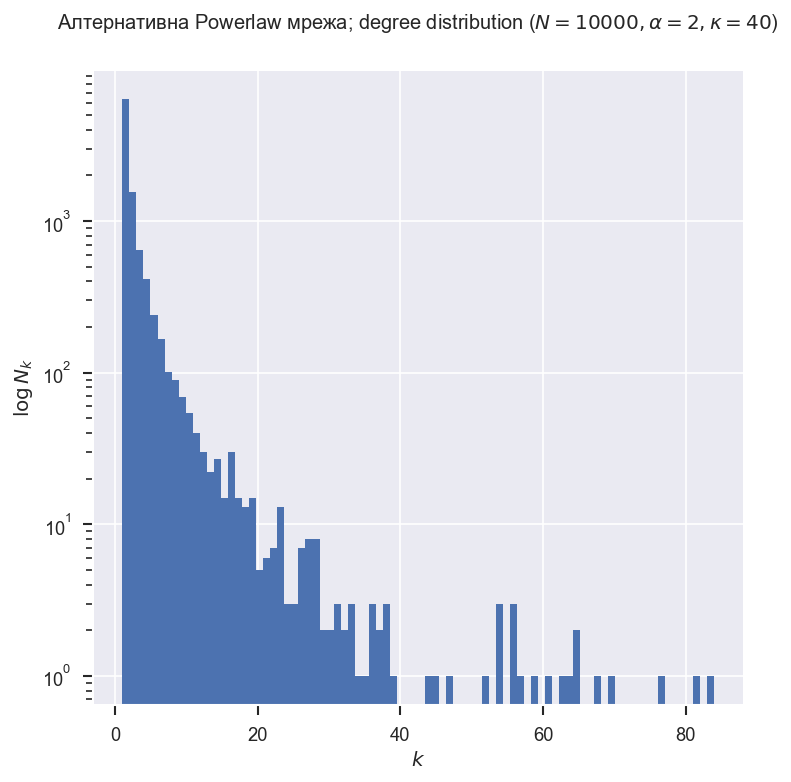

In [6]:
fig = plt.figure(figsize=(7, 7))
ax = fig.gca()

# draw the degree distribution
ks = list(dict(networkx.degree(g)).values())
ax.hist(ks, bins=max(ks))
ax.set_title('Алтернативна Powerlaw мрежа; degree distribution ($N = {n}, \\alpha = {e}, \\kappa = {k}$)'.format(n=N, e=alpha, k=cutoff), y=1.05)
ax.semilogy()
ax.set_xlabel('$k$')
ax.set_ylabel('$\\log \\, N_k$')
plt.show()